# Natural Language Processing (NLP)

In [36]:
# Libraries
import nltk
from nltk.corpus import stopwords

In [37]:
# Examples of some stop words in English
stopwords.words('english')[0:1000:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

### First Example

In [38]:
import pandas as pd

#Pulling in the data and looking at the top rows
messages = pd.read_csv('/Users/jared/Downloads/Ex_Files_Adv_NLP_Python_ML/Exercise Files/data/spam.csv', encoding = 'latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [39]:
#Clean up the data
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [40]:
# Summary stats on our data
messages.shape


(5572, 2)

In [41]:
# We have a lot more ham values than ham values
messages['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [42]:
# Missing Data
print('Number of nulls in label: {}'.format(messages['label'].isnull().sum()))
print('Number of nulls in text: {}'.format(messages['text'].isnull().sum()))

Number of nulls in label: 0
Number of nulls in text: 0


### Pre-Processing Text Data

In [43]:
import pandas as pd

#Changing the way the tables will be displayed so that we can read more of the data this time around
pd.set_option('display.max_colwidth', 100)

messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [44]:
#Remove Punctuation

#To do this, we need to show python what punctuation looks like
#This library has a package called "puncatuation" that we can use for this step
import string

#Showing the punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
#The reason we do this is to remove noise from the data
"This message is spam" == "This message is spam."

False

In [46]:
#Building a function to remove punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

messages['text_clean'] = messages['text'].apply(lambda x: remove_punct(x))
messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


In [47]:
# Tokenization - splitting our sentences into a list of words
import re

# \W+ will split a text wherever it sees one or more non-word characters (white space, special characters, etc.)
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

# We apply our function and then lower case all our words because python is case sensitive
messages['text_tokenized'] = messages['text_clean'].apply(lambda x: tokenize(x.lower()))

messages.head()

,label,text,text_clean,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


In [48]:
# Remove Stop Words
import nltk

stopwords = nltk.corpus.stopwords.words('english')

In [49]:
#Define a function to remove the stop words
def remove_stopwords(tokenized_text):
    text = [word for word in tokenized_text if word not in stopwords]
    return text

messages['text_nostop'] = messages['text_tokenized'].apply(lambda x: remove_stopwords(x))

messages.head()

,label,text,text_clean,text_tokenized,text_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


### Term Frequency - Inverse Document Frequency (TF-IDF)
- This creates a document-term matrix; one row per document, one column per word in the corpus
- Generates a weighting for each word/document pair intended to reflect how important a given word is to the document within the context of its frequency within a larger corpus

In [50]:
#Libraries
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

#Reformat Data
mess = pd.read_csv('/Users/jared/Downloads/Ex_Files_Adv_NLP_Python_ML/Exercise Files/data/spam.csv', encoding = 'latin-1')
mess = mess.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
mess.columns = ["label", "text"]
mess.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [51]:
#One function to pre-process the data
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [52]:
#Fitting a basic TFIDF Vectorizer and view the results
from sklearn.feature_extraction.text import TfidfVectorizer

#This will clean the data, fit it in a vectorizer, then create our document form matrix
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(mess['text'])

#Output
print(X_tfidf.shape)

#Feature Names
print(tfidf_vect.get_feature_names_out())

#Converting the sparse matrix to dataframe
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

(5572, 9395)
['' '0' '008704050406' ... 'ûïharry' 'ûò' 'ûówell']


,0,1,2,3,4,5,6,7,8,9,...,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#Applying a machine learning 
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Import the methods that will be needed to evaluate a basic model
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

In [55]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    messages['label'],
                                                    test_size = 0.2)

In [56]:
# Fit a basic Random Forest Model
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [57]:
# Make a prediction
y_pred = rf_model.predict(X_test)

In [58]:
# Evaluate model predictions using precision and recall
precision = precision_score(y_test, y_pred, pos_label = 'spam')
recall = recall_score(y_test, y_pred, pos_label = 'spam')
print('Precision: {} / Recall: {}'.format(round(precision, 3), round(recall,3)))

Precision: 1.0 / Recall: 0.783


### Word2Vec
- Word2Vec is a shallow, two-layer neural network that accepts a text corpus as an input, and it returns a set of vectors (also known as embeddings); each vector is a numberic representation of a given word.
- "You shall know a word by the company it keeps."
- Python learns the context of a word by looking at a window of words before and after it in the corpus. (Skip gramm method)
- When we convert all the words in our corpus into a vector representation, we can then graph each vector. This gives us the ability to see how similar two words are (in meaning) by finding their "cosine similarity" (cosine of the two angles of the two vectors).
- Theorectically, you can construct analogies with these vectors. For example, if you subtracts man from the vector "King" and then added "woman" you would get the vector for "Queen". Thus, the model could create the analogy "A man is to king as a woman is to queen".

### Some other pre-trained embeddings to explore
- glove-twitter-{25/50/100/200}
- glove-wiki-gigaword-{50/200/300}
- word2vec-google-news-300
- word2vec-ruscorpora-news-300

In [59]:
#Installing Gensim
!pip install -U gensim

In [60]:
# Load pretrained word vectors using gensim
import gensim.downloader as api

wiki_embeddings = api.load('glove-wiki-gigaword-100')

In [61]:
#Explore the word vector for "king"
wiki_embeddings['king']

# This is a numeric representation the word "king". Using the cosine similarity technique, we can find vectors that are the most similar to the vector for "king".

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [62]:
# Finding similar vectors
wiki_embeddings.most_similar('virtue')

[('ideals', 0.6479806303977966),
 ('devotion', 0.6334191560745239),
 ('belief', 0.6317397952079773),
 ('morality', 0.6111955046653748),
 ('discipline', 0.6109753251075745),
 ('virtues', 0.6106486916542053),
 ('true', 0.6067261099815369),
 ('patriotism', 0.6050897836685181),
 ('moral', 0.5999709963798523),
 ('necessity', 0.5992565751075745)]

## Training our own Word2Vec Model

In [63]:
# Read in data and clean up column names
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth',100)

messages = pd.read_csv('/Users/jared/Downloads/Ex_Files_Adv_NLP_Python_ML/Exercise Files/data/spam.csv', encoding = 'latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [64]:
# Using gensim's built-in data pre-processor
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, th..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, st, may, text, fa, to, to, receive,..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, don, think, he, goes, to, usf, he, lives, around, here, though]"


In [65]:
# Splitting the data for training purposes
X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'],
                                                    messages['label'], test_size = 0.3)

In [66]:
# Training our word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   window=5,
                                   min_count=2)


In [67]:
# Explore the word vecotr for "king" base on our trained model
w2v_model.wv['king']

array([-0.01797229,  0.03796896, -0.01247989, -0.00919668,  0.00075758,
       -0.0646351 ,  0.01687874,  0.08844687, -0.02555668, -0.0176046 ,
       -0.00804844, -0.06018168,  0.00256055,  0.01540339,  0.02296374,
       -0.02269714,  0.02903914, -0.04513906, -0.01040024, -0.06426272,
        0.0147326 ,  0.0036105 ,  0.02142582, -0.01967267, -0.0015225 ,
        0.00588816, -0.0305206 , -0.03970972, -0.04308887, -0.00210281,
        0.0560504 , -0.00100411,  0.00579926, -0.03712936, -0.02679488,
        0.03769806,  0.0057379 , -0.01711126, -0.01865261, -0.05598756,
        0.00525381, -0.03669051, -0.01565479,  0.00486852,  0.03748032,
       -0.01241765, -0.02512962, -0.01072057,  0.02868829,  0.0244469 ,
        0.01176187, -0.02995989, -0.01335105,  0.00326231, -0.01533011,
        0.01775981,  0.01933005, -0.00867135, -0.02273504,  0.01604127,
        0.01286724,  0.01080072, -0.00535594, -0.01226303, -0.04228556,
        0.04562112,  0.00315295,  0.02050807, -0.05822901,  0.05

In [68]:
# See most similar words to "king" based on word vectors from our trained model
w2v_model.wv.most_similar('king')

[('saw', 0.9813751578330994),
 ('await', 0.9807486534118652),
 ('lovable', 0.9807228446006775),
 ('also', 0.9806492328643799),
 ('man', 0.9805577993392944),
 ('part', 0.9804978966712952),
 ('earlier', 0.980495035648346),
 ('stuff', 0.9804238677024841),
 ('wake', 0.9804018139839172),
 ('next', 0.9803963899612427)]

## Prep Word Vectors

In [69]:
# Generate a list of words the word2vec model learned word vectors for
w2v_model.wv.index_to_key

['you',
 'to',
 'the',
 'and',
 'in',
 'is',
 'me',
 'my',
 'it',
 'for',
 'your',
 'call',
 'of',
 'that',
 'have',
 'on',
 'are',
 'can',
 'so',
 'now',
 'not',
 'but',
 'or',
 'do',
 'we',
 'get',
 'at',
 'ur',
 'if',
 'with',
 'no',
 'will',
 'be',
 'just',
 'this',
 'how',
 'ok',
 'up',
 'go',
 'gt',
 'what',
 'lt',
 'from',
 'free',
 'when',
 'out',
 'am',
 'all',
 'come',
 'know',
 'then',
 'll',
 'like',
 'got',
 'was',
 'day',
 'there',
 'good',
 'its',
 'time',
 'only',
 'he',
 'love',
 'text',
 'send',
 'want',
 'as',
 'about',
 'txt',
 'one',
 'need',
 'home',
 'stop',
 'she',
 'today',
 'back',
 'by',
 'lor',
 'dont',
 'see',
 'going',
 'sorry',
 'still',
 'da',
 'don',
 'tell',
 'our',
 'hi',
 'please',
 'any',
 'reply',
 'take',
 'mobile',
 'did',
 'later',
 'some',
 'they',
 're',
 'think',
 'oh',
 'been',
 'ì_',
 'night',
 'pls',
 'hope',
 'dear',
 'her',
 'new',
 'here',
 'where',
 'phone',
 'has',
 'well',
 'him',
 'give',
 'much',
 'happy',
 'week',
 'great',
 'hey'

In [72]:
# We are getting a nested set of arrays inside an array of all the word vectors for each word in a text
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index_to_key],
                              dtype=object) for ls in X_test],dtype=object)

In [83]:
# Length examiner
# The difference in the lengths of the two strings is going to be a problem - model wants a consistent set of features
for i, v in enumerate(w2v_vect):
    print(len(X_test.iloc[i]), len(v))

5 5
8 7
31 31
9 7
20 18
9 8
8 4
4 4
4 3
14 13
9 7
21 17
3 2
70 66
5 3
5 5
22 22
3 3
9 9
18 16
4 2
9 9
6 6
15 15
24 22
14 11
11 10
7 6
7 6
20 19
7 7
30 28
25 20
3 2
4 2
20 16
4 3
9 8
12 10
6 5
9 8
12 11
16 13
5 5
11 10
10 9
6 4
26 25
9 5
9 7
5 5
4 3
21 20
22 18
11 11
6 6
7 7
9 8
11 11
1 1
13 11
26 24
20 20
7 7
8 7
10 9
22 18
7 7
22 22
38 31
4 4
22 18
9 9
28 28
9 7
10 10
21 21
4 3
14 13
21 14
21 8
6 5
11 11
3 3
23 16
5 5
10 10
60 50
4 4
7 6
28 28
14 14
7 7
35 35
6 5
24 17
7 7
12 11
9 8
7 6
67 66
24 20
6 4
6 3
8 7
6 4
11 11
17 14
14 14
23 22
6 5
20 17
9 5
31 29
23 22
11 9
19 19
10 10
17 14
7 7
16 14
11 10
7 7
8 8
4 4
6 5
24 19
16 15
11 10
25 24
8 7
20 20
18 16
6 5
19 19
4 4
10 8
10 10
13 12
4 4
5 5
7 6
9 7
2 2
22 20
8 8
27 5
5 5
22 21
29 29
9 8
8 8
6 6
4 3
6 6
8 7
6 6
8 8
7 7
10 8
5 5
24 23
9 9
28 23
10 10
6 6
5 3
5 5
18 17
5 5
17 15
38 23
10 10
5 5
6 5
3 3
4 4
11 10
7 7
19 16
10 10
4 4
6 6
21 20
9 9
19 18
13 9
20 18
6 6
8 7
11 11
16 15
11 10
8 7
7 6
11 11
3 3
23 19
6 4
25 25
9 9
26 25
7 

In [84]:
# We are now averaging all the vectors in a sentence acrossed each other so that all features will have the same length.
w2v_vect_avg = []

for vect in w2v_vect:
    if len(vect) != 0:
        w2v_vect_avg.append(vect.mean(axis=0))
    else:
        w2v_vect_avg.append(np.zeros(100))

In [87]:
# Length check
# Now we can see that all the features have the same length! Yay!
for i, v in enumerate(w2v_vect_avg):
    print(len(X_test.iloc[i]), len(v))

5 100
8 100
31 100
9 100
20 100
9 100
8 100
4 100
4 100
14 100
9 100
21 100
3 100
70 100
5 100
5 100
22 100
3 100
9 100
18 100
4 100
9 100
6 100
15 100
24 100
14 100
11 100
7 100
7 100
20 100
7 100
30 100
25 100
3 100
4 100
20 100
4 100
9 100
12 100
6 100
9 100
12 100
16 100
5 100
11 100
10 100
6 100
26 100
9 100
9 100
5 100
4 100
21 100
22 100
11 100
6 100
7 100
9 100
11 100
1 100
13 100
26 100
20 100
7 100
8 100
10 100
22 100
7 100
22 100
38 100
4 100
22 100
9 100
28 100
9 100
10 100
21 100
4 100
14 100
21 100
21 100
6 100
11 100
3 100
23 100
5 100
10 100
60 100
4 100
7 100
28 100
14 100
7 100
35 100
6 100
24 100
7 100
12 100
9 100
7 100
67 100
24 100
6 100
6 100
8 100
6 100
11 100
17 100
14 100
23 100
6 100
20 100
9 100
31 100
23 100
11 100
19 100
10 100
17 100
7 100
16 100
11 100
7 100
8 100
4 100
6 100
24 100
16 100
11 100
25 100
8 100
20 100
18 100
6 100
19 100
4 100
10 100
10 100
13 100
4 100
5 100
7 100
9 100
2 100
22 100
8 100
27 100
5 100
22 100
29 100
9 100
8 100
6 100
4 100

## Doc2Vec: Our Second Embedding Technique
- Instead of creating a vector for each word, like word2vec, we will create a vector for each document (i.e. collection of words whether sentence or paragraph).
- Shallow, two-layer neural network that accepts a text corpus as an input, and it returns a set of vectors;each vector is a numeric representation of a sentence or paragraph.
- Much easier to use in machine learning than word2vec
- Captures an entire sentence of texts in a much more elequent way than word2vec

### Example of Doc2Vec

In [90]:
# Training our own model
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth',100)

messages = pd.read_csv('/Users/jared/Downloads/Ex_Files_Adv_NLP_Python_ML/Exercise Files/data/spam.csv', encoding = 'latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'],
                                                    messages['label'], test_size = 0.2)

In [93]:
#Create tagged document objects to prepare to train the model
tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

In [94]:
# Look at what a tagged document looks like
tagged_docs[0]

TaggedDocument(words=['it', 'so', 'happens', 'that', 'there', 'waxsto', 'do', 'wat', 'you', 'want', 'she', 'can', 'come', 'and', 'ill', 'get', 'her', 'medical', 'insurance', 'and', 'she', 'll', 'be', 'able', 'to', 'deliver', 'and', 'have', 'basic', 'care', 'currently', 'shopping', 'for', 'the', 'right', 'medical', 'insurance', 'for', 'her', 'so', 'just', 'give', 'me', 'til', 'friday', 'morning', 'thats', 'when', 'll', 'see', 'the', 'major', 'person', 'that', 'can', 'guide', 'me', 'to', 'the', 'right', 'insurance'], tags=[0])

In [96]:
# Training a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs,
                                  vector_size = 100,
                                  window=5,
                                  min_count=2)

In [99]:
# We can see what the model would give us when we give it a list of strings that represent a document
d2v_model.infer_vector(['i','am','learning','nlp'])

array([-2.04929747e-02,  2.43416317e-02,  3.87895410e-03, -1.01131387e-02,
        5.08678332e-03, -3.37344334e-02,  8.85630958e-03,  4.16524708e-02,
       -9.96657182e-03, -1.28019666e-02, -1.61383264e-02, -3.17746624e-02,
       -7.12623633e-03,  1.64966304e-02, -1.99364591e-03, -2.97172759e-02,
        9.90291033e-03, -2.73617432e-02, -3.37402010e-03, -3.05478852e-02,
        5.75666223e-03,  1.35320397e-02,  1.63600203e-02, -1.62327848e-02,
        5.10633644e-03,  5.19444467e-03, -2.33849641e-02, -2.03187158e-03,
       -1.91816352e-02,  2.91970326e-03,  3.19956578e-02,  4.20505181e-03,
        4.91092773e-03, -9.07969102e-03, -1.42072979e-02,  3.65614295e-02,
       -2.09291276e-04, -8.51552375e-03, -2.47893557e-02, -2.83172484e-02,
       -6.68748794e-03, -1.08713200e-02,  5.49159478e-04, -5.72500471e-03,
        1.24577126e-02, -1.99182853e-02, -1.11943884e-02, -6.00089086e-03,
        1.79549456e-02,  1.57390330e-02,  1.45467939e-02, -1.76873393e-02,
       -1.39351748e-03, -

In [100]:
# There are some pre-trained document vectors that you can use, but you have to go find them.

In [102]:
# Preparing vectors to be used in a machine learning model
vectors = [[d2v_model.infer_vector(words)] for words in X_test]

In [103]:
vectors[0]

[array([-0.05158072,  0.05700507,  0.01331507, -0.02232455,  0.0044267 ,
        -0.09097319,  0.00648142,  0.14502198, -0.0152268 , -0.02129563,
        -0.05413479, -0.08160003, -0.02342354,  0.03939999, -0.01154473,
        -0.07486398,  0.00962481, -0.08049034, -0.00482235, -0.08957372,
         0.01427324,  0.04998262,  0.03663657, -0.05144385,  0.02700192,
         0.00328802, -0.07192648, -0.01175516, -0.06063627,  0.00357119,
         0.09796312,  0.00980407,  0.0317958 , -0.03476879, -0.03342996,
         0.10751708,  0.00470118, -0.02850092, -0.06875665, -0.06805529,
        -0.01184458, -0.02454189,  0.00060378, -0.02095259,  0.03557323,
        -0.06061698, -0.04053532, -0.01757381,  0.04414952,  0.02589446,
         0.03203005, -0.04204271,  0.00235189, -0.00962821, -0.02894264,
         0.0337394 ,  0.00768133, -0.0290415 , -0.08021579, -0.00941073,
         0.02875769,  0.01606268, -0.00244415, -0.01258142, -0.06807543,
         0.05925255,  0.00910223,  0.0381275 , -0.0

## Recurrent Nueral Networks
- Pattern matching through the connection of many very simple functions to create one very powerful function, very loosely based on conencted nuerons in the brain.
- a RNN has an understanding of the data's sequential nature (using feedback loops that form a sense of memory).

In [106]:
# Preparing data for RNN
# We aren't cleaning the data here like we've done with the other examples because the data needs to be in a different format
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

messages = pd.read_csv('/Users/jared/Downloads/Ex_Files_Adv_NLP_Python_ML/Exercise Files/data/spam.csv', encoding = 'latin-1')
messages = messages.drop(labels  =["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
labels = np.where(messages['label'] == 'spam', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(messages['text'],
                                                    labels, test_size = 0.2)

In [132]:
# Prep Data for Modeling
# Installing keras
!pip install -U keras
!pip install -U tensorflow

In [138]:
# Importing the tools we will need for our model
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [139]:
# Initializing and fitting our tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [140]:
# Use the tokenizer to transform the text messages  in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [141]:
# What do these sequences look like, each int represents a word in our text
X_train_seq[0]

[640,
 322,
 120,
 32,
 1031,
 715,
 15,
 874,
 529,
 82,
 70,
 135,
 2,
 1274,
 21,
 767,
 1136,
 716,
 98,
 186,
 294,
 767,
 1691,
 2029,
 768,
 1137,
 1692,
 283]

In [142]:
# We need to standardize the length of our sequences for our machine learning model
# We are setting the length of the text messages to 50. If it's longer, it'll be truncated, and if it's too short, it'll get padded with zeroes.
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [143]:
# Example of a padded sequence
X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        640,  322,  120,   32, 1031,  715,   15,  874,  529,   82,   70,
        135,    2, 1274,   21,  767, 1136,  716,   98,  186,  294,  767,
       1691, 2029,  768, 1137, 1692,  283], dtype=int32)

### Fitting Model on Prepared Data

In [155]:
# Libraries
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [156]:
# Construct a simple RNN model
model = Sequential()

# This 32 parameter can be tuned
model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout = 0, recurrent_dropout = 0)) #The dropout is a way to regularize the RNN
model.add(Dense(32, activation = 'relu')) # Relu is popular for activation function
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          256576    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 265,985
Trainable params: 265,985
Non-trainable params: 0
_________________________________________________________________


In [157]:
# Compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [158]:
# Fit the RNN Model
history = model.fit(X_train_seq_padded, y_train,
                    batch_size = 32, epochs = 10,
                    validation_data = (X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 17s 77ms/step - loss: 0.2456 - accuracy: 0.9177 - precision_m: 0.5355 - recall_m: 0.4455 - val_loss: 0.0642 - val_accuracy: 0.9785 - val_precision_m: 0.9119 - val_recall_m: 0.8918
Epoch 2/10
140/140 [==============================] - 8s 55ms/step - loss: 0.0368 - accuracy: 0.9879 - precision_m: 0.9691 - recall_m: 0.9351 - val_loss: 0.0361 - val_accuracy: 0.9883 - val_precision_m: 0.9298 - val_recall_m: 0.9283
Epoch 3/10
140/140 [==============================] - 6s 45ms/step - loss: 0.0138 - accuracy: 0.9971 - precision_m: 0.9906 - recall_m: 0.9726 - val_loss: 0.0388 - val_accuracy: 0.9883 - val_precision_m: 0.9583 - val_recall_m: 0.9138
Epoch 4/10
140/140 [==============================] - 7s 46ms/step - loss: 0.0070 - accuracy: 0.9984 - precision_m: 0.9893 - recall_m: 0.9854 - val_loss: 0.0392 - val_accuracy: 0.9874 - val_precision_m: 0.9536 - val_recall_m: 0.9138
Epoch 5/10
140/140 [==============================] - 7s 47ms/step 

In [161]:
!pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.8 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 1.2 MB/s eta 0:00:00ta 0:00:01


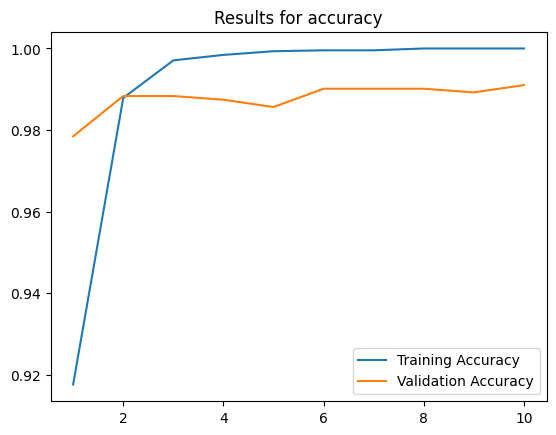

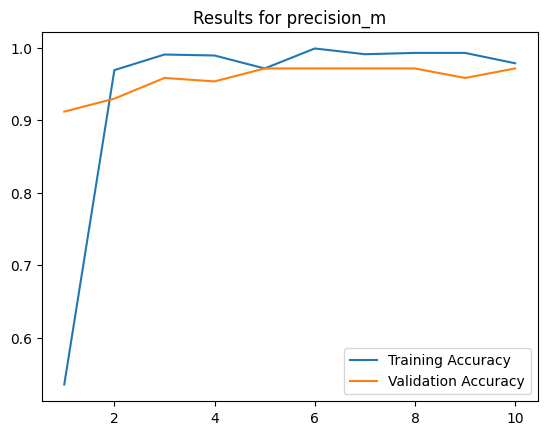

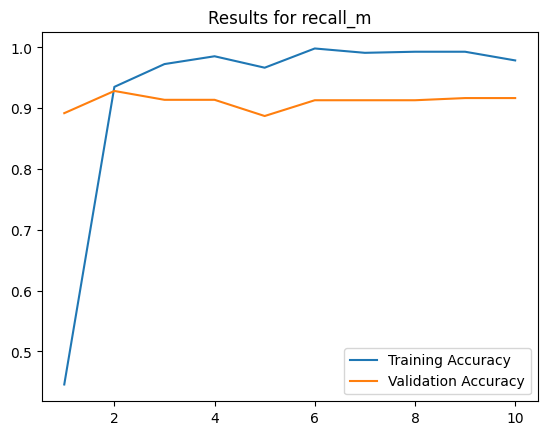

In [163]:
# Plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label = 'Training Accuracy')
    plt.plot(epochs, val_acc, label = 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

# Compare NLP Techniques: Prep the Data for Modeling